In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/abalone.csv")


print("Data Preview:")
print(df.head())


Data Preview:
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


<ipython-input-10-6427c20c4ca5>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeClass', data=df, palette='Set2')


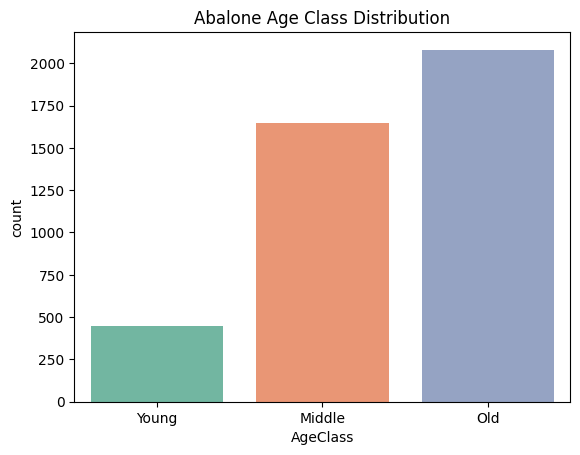


📋 Classification Report:
              precision    recall  f1-score   support

      Middle       0.66      0.66      0.66       308
         Old       0.79      0.84      0.82       425
       Young       0.85      0.65      0.74       103

    accuracy                           0.75       836
   macro avg       0.77      0.72      0.74       836
weighted avg       0.75      0.75      0.75       836


📊 Confusion Matrix:


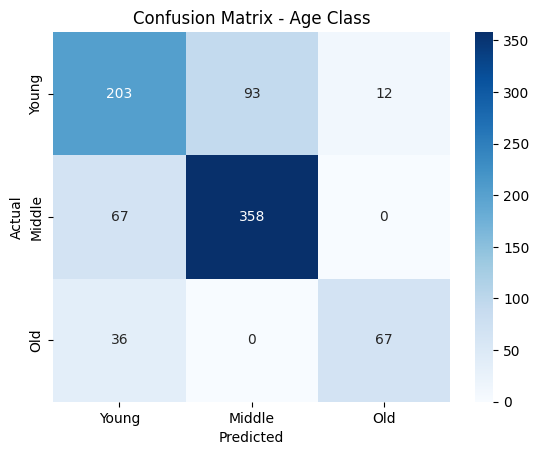


📉 Regression Metrics:
MSE: 4.912791387559809
R2 Score: 0.5770191353452927


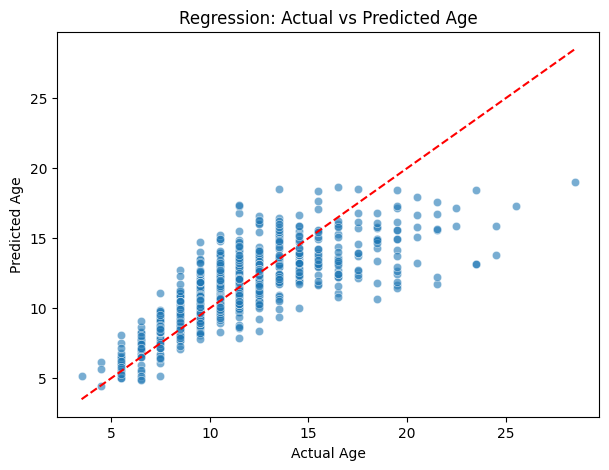

In [ ]:

df['Age'] = df['Rings'] + 1.5


features = df[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
               'Shucked weight', 'Viscera weight', 'Shell weight']]
# Remove 'Rings', 'Age' and now 'AgeClass'

# ... (rest of your code) ...

X = features  # Use the updated features
y_class = target_class
y_reg = target_regression
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # M=2, F=0, I=1


#features = df.drop(columns=['Rings', 'Age'])  # drop rings and use Age
#target_regression = df['Age']


bins = [0, 8, 11, 30]
labels = ['Young', 'Middle', 'Old']
df['AgeClass'] = pd.cut(df['Age'], bins=bins, labels=labels)

target_class = df['AgeClass']


sns.countplot(x='AgeClass', data=df, palette='Set2')
plt.title("Abalone Age Class Distribution")
plt.show()

df.dropna(inplace=True)

X = features
y_class = target_class
y_reg = target_regression

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)

X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)

print("\n Classification Report:")
print(classification_report(y_test_c, y_pred_c))

print("\n Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Age Class")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_r, y_train_r)
y_pred_r = model.predict(X_test_r)

print("\n Regression Metrics:")
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R2 Score:", r2_score(y_test_r, y_pred_r))


plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test_r, y=y_pred_r, alpha=0.6)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Regression: Actual vs Predicted Age")
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.show()
